In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/orders-pandas101-csv/orders.csv


Tech with Tim tutorial based notes: https://www.youtube.com/watch?v=EXIgjIBu4EU&t=125s

In [2]:
df = pd.read_csv("/kaggle/input/orders-pandas101-csv/orders.csv")

In [3]:
df.head(5)

,OrderID,CustomerName,Product,Category,Quantity,Price,OrderDate,Shipped,Country
0,1001,John Smith,Laptop,Electronics,1,1200.0,2024-06-01,Yes,USA
1,1002,Sarah Lee,Headphones,Electronics,2,150.0,2024-06-03,No,Canada
2,1003,Ali Khan,Office Chair,Furniture,1,300.0,2024-06-04,Yes,UAE
3,1004,Alice Wong,Desk Lamp,Furniture,3,45.0,2024-06-05,Yes,Singapore
4,1005,Carlos Mendez,Keyboard,Electronics,2,80.0,2024-06-06,No,Mexico


In [4]:
# Pandas has 2 main components . 1. Dataframe 2.Series (meaning rows or columns)
#Series is a 1D array (labelled i..e, rather than assigning plain index numbers it also assigns labels that are intutive.)
#Dataframe is a 2D labelled array (like a spreadsheet but programmable and powerful).
#Dataframe is built on numpy backend which is a C based library. 
#It supports label based indexing. 
#Column wise and row-wise operations
#Support mixed data types
#Fast and vectorized operations. 



In [5]:
data = {
    "name":"Pritam",
    "roll": [25],
    "class": [12]
}

pd.DataFrame(data)



data = {
    'Name':'Pritam',
    'roll': [25,30],
    'class': [12,35]
}

pd.DataFrame(data)

,Name,roll,class
0,Pritam,25,12
1,Pritam,30,35


Every row is given Index in a dataframe.

Data can be loaded from 3 ways. 
1. Load via csv
2. Load via excel
3. Load via dictionary values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       40 non-null     int64  
 1   CustomerName  40 non-null     object 
 2   Product       40 non-null     object 
 3   Category      40 non-null     object 
 4   Quantity      40 non-null     int64  
 5   Price         40 non-null     float64
 6   OrderDate     40 non-null     object 
 7   Shipped       40 non-null     object 
 8   Country       40 non-null     object 
dtypes: float64(1), int64(2), object(6)
memory usage: 2.9+ KB


Since we didn't surround the strings with double quotes in csv so they are being represented as objects in our data frame. we can change them to strings if we want.

In [7]:
df.describe()

,OrderID,Quantity,Price
count,40.000000,40.000000,40.000000
mean,1020.500000,5.450000,106.457500
std,11.690452,15.903475,201.091854
min,1001.000000,1.000000,0.800000
25%,1010.750000,1.000000,18.000000
50%,1020.500000,1.000000,43.500000
75%,1030.250000,2.250000,112.500000
max,1040.000000,100.000000,1200.000000


generate descriptive statistics.
summarizes central tendency excluding NaN values. 
Analyszes both numeric and object series as well as DataFrame column sets of mixed data types.


In [8]:
df.columns

Index(['OrderID', 'CustomerName', 'Product', 'Category', 'Quantity', 'Price',
       'OrderDate', 'Shipped', 'Country'],
      dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=40, step=1)

range of our index starts from 0 and it ends at 40 with a step of 1. 

# Dataframe advantages: we can index by rows and we can also index by column. 

In [10]:
df["Country"].value_counts()

Country
USA             3
South Korea     3
Japan           3
Canada          2
France          2
UAE             2
Italy           2
UK              2
Germany         2
Singapore       1
India           1
Mexico          1
Australia       1
Spain           1
Egypt           1
China           1
Poland          1
Saudi Arabia    1
Brazil          1
Pakistan        1
Sweden          1
Argentina       1
Russia          1
Morocco         1
Colombia        1
Portugal        1
Iran            1
Ukraine         1
Name: count, dtype: int64

In [11]:
#we can put multiple columns inside the index by directly providing a list of reference. 
df[["Country","CustomerName"]]

,Country,CustomerName
0,USA,John Smith
1,Canada,Sarah Lee
2,UAE,Ali Khan
3,Singapore,Alice Wong
4,Mexico,Carlos Mendez
5,UAE,Nora Ibrahim
6,UK,Emily Davis
7,South Korea,James Park
8,Italy,Maria Rossi
9,Japan,Takeshi Nakamura


In [12]:
df["Country"] # Querying a single column returns us an Index. However, when we query multiple columns we get a dataframe in return. 

0              USA
1           Canada
2              UAE
3        Singapore
4           Mexico
5              UAE
6               UK
7      South Korea
8            Italy
9            Japan
10          France
11           India
12       Australia
13           Spain
14           China
15           Egypt
16          Poland
17             USA
18           Japan
19    Saudi Arabia
20          Canada
21          Brazil
22         Germany
23        Pakistan
24          Sweden
25          France
26       Argentina
27          Russia
28     South Korea
29           Italy
30         Morocco
31         Germany
32        Colombia
33             USA
34           Japan
35              UK
36        Portugal
37            Iran
38     South Korea
39         Ukraine
Name: Country, dtype: object

In [13]:
#However if we want to access it by row then we use iloc function. e.g.
df.iloc[0] #returns all the elements present in the 0th row.  #iloc means index location. 

OrderID                1001
CustomerName     John Smith
Product              Laptop
Category        Electronics
Quantity                  1
Price                1200.0
OrderDate        2024-06-01
Shipped                 Yes
Country                 USA
Name: 0, dtype: object

In [14]:
# we can convert it to list as well 
list(df.iloc[0]) # Returns a list containing elements from the 1st row. 

[np.int64(1001),
 'John Smith',
 'Laptop',
 'Electronics',
 np.int64(1),
 np.float64(1200.0),
 '2024-06-01',
 'Yes',
 'USA']

In [15]:
# If we were to reference 1st row 2nd column value then 
df.iloc[0]["Country"]

'USA'

In [16]:
df[df["Category"] == "Electronics"]
#Filtering Dataframe

,OrderID,CustomerName,Product,Category,Quantity,Price,OrderDate,Shipped,Country
0,1001,John Smith,Laptop,Electronics,1,1200.0,2024-06-01,Yes,USA
1,1002,Sarah Lee,Headphones,Electronics,2,150.0,2024-06-03,No,Canada
4,1005,Carlos Mendez,Keyboard,Electronics,2,80.0,2024-06-06,No,Mexico
7,1008,James Park,Monitor,Electronics,2,220.0,2024-06-09,No,South Korea
9,1010,Takeshi Nakamura,Mouse,Electronics,1,35.0,2024-06-11,Yes,Japan
10,1011,Sophie Martin,Webcam,Electronics,1,85.0,2024-06-12,Yes,France
13,1014,Diego Rodriguez,USB Drive,Electronics,5,25.0,2024-06-15,Yes,Spain
16,1017,Anna Kowalski,Wireless Mouse,Electronics,2,45.0,2024-06-18,Yes,Poland
18,1019,Yuki Tanaka,Calculator,Electronics,1,15.0,2024-06-20,Yes,Japan
21,1022,Isabella Silva,Bluetooth Speaker,Electronics,1,95.0,2024-06-23,Yes,Brazil


In [17]:
#Filtering multiple things 
df[(df["Category"] == "Electronics") & (df["Quantity"] == 2)]
#Filtering Dataframe

,OrderID,CustomerName,Product,Category,Quantity,Price,OrderDate,Shipped,Country
1,1002,Sarah Lee,Headphones,Electronics,2,150.0,2024-06-03,No,Canada
4,1005,Carlos Mendez,Keyboard,Electronics,2,80.0,2024-06-06,No,Mexico
7,1008,James Park,Monitor,Electronics,2,220.0,2024-06-09,No,South Korea
16,1017,Anna Kowalski,Wireless Mouse,Electronics,2,45.0,2024-06-18,Yes,Poland
38,1039,Daniel Kim,Power Strip,Electronics,2,18.0,2024-07-10,No,South Korea


In [18]:
#or condition
df[(df["Category"] == "Electronics") | (df["Quantity"] == 2)]

,OrderID,CustomerName,Product,Category,Quantity,Price,OrderDate,Shipped,Country
0,1001,John Smith,Laptop,Electronics,1,1200.0,2024-06-01,Yes,USA
1,1002,Sarah Lee,Headphones,Electronics,2,150.0,2024-06-03,No,Canada
4,1005,Carlos Mendez,Keyboard,Electronics,2,80.0,2024-06-06,No,Mexico
7,1008,James Park,Monitor,Electronics,2,220.0,2024-06-09,No,South Korea
9,1010,Takeshi Nakamura,Mouse,Electronics,1,35.0,2024-06-11,Yes,Japan
10,1011,Sophie Martin,Webcam,Electronics,1,85.0,2024-06-12,Yes,France
11,1012,Raj Patel,File Cabinet,Furniture,2,180.0,2024-06-13,No,India
13,1014,Diego Rodriguez,USB Drive,Electronics,5,25.0,2024-06-15,Yes,Spain
16,1017,Anna Kowalski,Wireless Mouse,Electronics,2,45.0,2024-06-18,Yes,Poland
18,1019,Yuki Tanaka,Calculator,Electronics,1,15.0,2024-06-20,Yes,Japan


In [19]:
#df[df["Quantity"] > 2]
#df[df["Quantity"] != 2]
df[df["Quantity"] == 2]

,OrderID,CustomerName,Product,Category,Quantity,Price,OrderDate,Shipped,Country
1,1002,Sarah Lee,Headphones,Electronics,2,150.0,2024-06-03,No,Canada
4,1005,Carlos Mendez,Keyboard,Electronics,2,80.0,2024-06-06,No,Mexico
7,1008,James Park,Monitor,Electronics,2,220.0,2024-06-09,No,South Korea
11,1012,Raj Patel,File Cabinet,Furniture,2,180.0,2024-06-13,No,India
16,1017,Anna Kowalski,Wireless Mouse,Electronics,2,45.0,2024-06-18,Yes,Poland
22,1023,Oliver Schmidt,Office Plant,Furniture,2,35.0,2024-06-24,Yes,Germany
38,1039,Daniel Kim,Power Strip,Electronics,2,18.0,2024-07-10,No,South Korea


In [20]:
# Complex filtering
df[df["CustomerName"].str.startswith("A")]

,OrderID,CustomerName,Product,Category,Quantity,Price,OrderDate,Shipped,Country
2,1003,Ali Khan,Office Chair,Furniture,1,300.0,2024-06-04,Yes,UAE
3,1004,Alice Wong,Desk Lamp,Furniture,3,45.0,2024-06-05,Yes,Singapore
15,1016,Ahmed Hassan,Printer Paper,Stationery,20,8.0,2024-06-17,Yes,Egypt
16,1017,Anna Kowalski,Wireless Mouse,Electronics,2,45.0,2024-06-18,Yes,Poland
30,1031,Amira Hassan,USB Hub,Electronics,1,32.0,2024-07-02,Yes,Morocco
33,1034,Alex Johnson,Index Cards,Stationery,100,0.8,2024-07-05,Yes,USA
39,1040,Anna Ivanova,Desk Clock,Furniture,1,35.0,2024-07-11,Yes,Ukraine


In [21]:
df[df["CustomerName"].str.endswith("a")]

,OrderID,CustomerName,Product,Category,Quantity,Price,OrderDate,Shipped,Country
9,1010,Takeshi Nakamura,Mouse,Electronics,1,35.0,2024-06-11,Yes,Japan
18,1019,Yuki Tanaka,Calculator,Electronics,1,15.0,2024-06-20,Yes,Japan
19,1020,Fatima Al-Zahra,Whiteboard,Furniture,1,120.0,2024-06-21,Yes,Saudi Arabia
21,1022,Isabella Silva,Bluetooth Speaker,Electronics,1,95.0,2024-06-23,Yes,Brazil
39,1040,Anna Ivanova,Desk Clock,Furniture,1,35.0,2024-07-11,Yes,Ukraine


In [22]:
df[df["Country"].isin(["USA","CA"])]

,OrderID,CustomerName,Product,Category,Quantity,Price,OrderDate,Shipped,Country
0,1001,John Smith,Laptop,Electronics,1,1200.0,2024-06-01,Yes,USA
17,1018,Michael Brown,Desk Organizer,Furniture,1,65.0,2024-06-19,No,USA
33,1034,Alex Johnson,Index Cards,Stationery,100,0.8,2024-07-05,Yes,USA


In [23]:
df[~df["Country"].isin(["USA","CA"])].head(5)

,OrderID,CustomerName,Product,Category,Quantity,Price,OrderDate,Shipped,Country
1,1002,Sarah Lee,Headphones,Electronics,2,150.0,2024-06-03,No,Canada
2,1003,Ali Khan,Office Chair,Furniture,1,300.0,2024-06-04,Yes,UAE
3,1004,Alice Wong,Desk Lamp,Furniture,3,45.0,2024-06-05,Yes,Singapore
4,1005,Carlos Mendez,Keyboard,Electronics,2,80.0,2024-06-06,No,Mexico
5,1006,Nora Ibrahim,Notebook,Stationery,5,5.0,2024-06-07,Yes,UAE


## Update the data

In [24]:
# Locate data based on label rather than Index

df.iloc[5]

OrderID                 1006
CustomerName    Nora Ibrahim
Product             Notebook
Category          Stationery
Quantity                   5
Price                    5.0
OrderDate         2024-06-07
Shipped                  Yes
Country                  UAE
Name: 5, dtype: object

But what if we do not know the index position of OrderID 1006. In that case,we use loc function. 

In [25]:
df.loc[df["CustomerName"] == "Nora Ibrahim"]  #This way we are able to locate the Customer named Nora through loc function.

,OrderID,CustomerName,Product,Category,Quantity,Price,OrderDate,Shipped,Country
5,1006,Nora Ibrahim,Notebook,Stationery,5,5.0,2024-06-07,Yes,UAE


In [26]:
# Locate the row and then update the row. 
df.loc[df["CustomerName"]=="Nora Ibrahim", "Product"] = "Tim"

In [27]:
df.loc[df["CustomerName"] == "Nora Ibrahim"]
#We have now changed/updated the content. 

,OrderID,CustomerName,Product,Category,Quantity,Price,OrderDate,Shipped,Country
5,1006,Nora Ibrahim,Tim,Stationery,5,5.0,2024-06-07,Yes,UAE


In [28]:
df.loc[df["Country"] == "USA", "Country"] = "United States"

In [29]:
df.loc[df["Country"] == "United States"]

,OrderID,CustomerName,Product,Category,Quantity,Price,OrderDate,Shipped,Country
0,1001,John Smith,Laptop,Electronics,1,1200.0,2024-06-01,Yes,United States
17,1018,Michael Brown,Desk Organizer,Furniture,1,65.0,2024-06-19,No,United States
33,1034,Alex Johnson,Index Cards,Stationery,100,0.8,2024-07-05,Yes,United States


In [30]:
df["Country"] = df.Country.str.upper()

In [31]:
df["Country"].value_counts().head(5)

Country
UNITED STATES    3
SOUTH KOREA      3
JAPAN            3
CANADA           2
FRANCE           2
Name: count, dtype: int64

## Dropping data

In [32]:
df = df.drop(39) #This directly drops the data that is present at index 39.
# Above drop removes the row at index 39

In [33]:
df.tail()

,OrderID,CustomerName,Product,Category,Quantity,Price,OrderDate,Shipped,Country
34,1035,Yuki Yamamoto,Monitor Stand,Electronics,1,55.0,2024-07-06,Yes,JAPAN
35,1036,Emma Thompson,Desk Lamp with USB,Furniture,1,68.0,2024-07-07,No,UK
36,1037,Carlos Santos,Wireless Earbuds,Electronics,1,125.0,2024-07-08,Yes,PORTUGAL
37,1038,Leila Mansouri,Desk Pad,Furniture,1,28.0,2024-07-09,Yes,IRAN
38,1039,Daniel Kim,Power Strip,Electronics,2,18.0,2024-07-10,No,SOUTH KOREA


In [34]:
df = df.dropna() #Removes NA values. 

In [35]:
df.fillna({"OrderID": 0}, inplace = True)
# Wherever OrderID is blank , fill it with 0 

In [36]:
# Rename Columns
df.rename(columns = {"OrderID" : "Order ID"}, inplace = True)

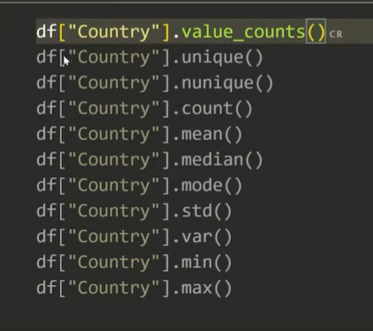

#### Methods in Pandas

In [37]:
df.groupby("Country")["Price"].sum()

Country
ARGENTINA          22.0
AUSTRALIA          12.0
BRAZIL             95.0
CANADA            153.5
CHINA             280.0
COLOMBIA           42.0
EGYPT               8.0
FRANCE            160.0
GERMANY           175.0
INDIA             180.0
IRAN               28.0
ITALY              19.5
JAPAN             105.0
MEXICO             80.0
MOROCCO            32.0
PAKISTAN            4.0
POLAND             45.0
PORTUGAL          125.0
RUSSIA              2.5
SAUDI ARABIA      120.0
SINGAPORE          45.0
SOUTH KOREA       348.0
SPAIN              25.0
SWEDEN             28.0
UAE               305.0
UK                518.0
UNITED STATES    1265.8
Name: Price, dtype: float64

In [38]:
df.sort_values("Price",ascending=False)

,Order ID,CustomerName,Product,Category,Quantity,Price,OrderDate,Shipped,Country
0,1001,John Smith,Laptop,Electronics,1,1200.0,2024-06-01,Yes,UNITED STATES
6,1007,Emily Davis,Standing Desk,Furniture,1,450.0,2024-06-08,Yes,UK
2,1003,Ali Khan,Office Chair,Furniture,1,300.0,2024-06-04,Yes,UAE
14,1015,Lisa Chen,Bookshelf,Furniture,1,280.0,2024-06-16,No,CHINA
7,1008,James Park,Monitor,Electronics,2,220.0,2024-06-09,No,SOUTH KOREA
11,1012,Raj Patel,File Cabinet,Furniture,2,180.0,2024-06-13,No,INDIA
1,1002,Sarah Lee,Headphones,Electronics,2,150.0,2024-06-03,No,CANADA
31,1032,Thomas Müller,Document Scanner,Electronics,1,140.0,2024-07-03,Yes,GERMANY
36,1037,Carlos Santos,Wireless Earbuds,Electronics,1,125.0,2024-07-08,Yes,PORTUGAL
19,1020,Fatima Al-Zahra,Whiteboard,Furniture,1,120.0,2024-06-21,Yes,SAUDI ARABIA


In [39]:
# df.to_csv("new_file.csv",index=False)

In [40]:
df.head(5)

,Order ID,CustomerName,Product,Category,Quantity,Price,OrderDate,Shipped,Country
0,1001,John Smith,Laptop,Electronics,1,1200.0,2024-06-01,Yes,UNITED STATES
1,1002,Sarah Lee,Headphones,Electronics,2,150.0,2024-06-03,No,CANADA
2,1003,Ali Khan,Office Chair,Furniture,1,300.0,2024-06-04,Yes,UAE
3,1004,Alice Wong,Desk Lamp,Furniture,3,45.0,2024-06-05,Yes,SINGAPORE
4,1005,Carlos Mendez,Keyboard,Electronics,2,80.0,2024-06-06,No,MEXICO
